# What makes a movie a commercial success?

###### A data science approach to dissect the economics of movie-making business



## Section 1: Business Understanding

In this notebook, I will use the IMDb publlic dataset and visualization tools in order to answer improtant questions about what factors lead to a commercial success of a movie.  The key questions tht I will try to answer are as follows:
1. Do certain movie genres make more money than others?
2. Does the amount of funding for a movie have an impact on commercial success?
3. What impact does duration have on the success of a movie?
4. Do viewer ratings have an impact on how well a movie will do in the Box Office?
5. Does the number of votes impact the success of a movie?

Answering these questions could dramatically improve the decision processes underlying moie production.




## Section 2: Data Understanding

The IMDB movie dataset covers over 80000 movies and accounts for all the basic attributes one would expect such as duration, genre, country, language, and gross income. The dataset can be accessed here: https://www.imdb.com/interfaces/

The following codeblock enables me to import the data and convert into a Pandas Dataframe

In [73]:
#import necessary libraries
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
cwd = os.getcwd()
import re
import math
import numpy as np
pd.reset_option('^display.', silent=True)
np.set_printoptions(suppress=True)

In [74]:
imdb_df = pd.read_csv(cwd+'/datasets/imdb.csv')  #import imdb csv

## Section 3: Data Preparation
In this section, we will try to understand the dataset on a colummn by column basis and figure out which columns are valauble and how we could still make the most out of seemingly not valuable ones and also address issues related to missing data.


In [75]:
imdb_df.columns #Printing columns to understand the dataset


Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [76]:

imdb_df.isna().sum()/imdb_df.shape[0] * 100 #Let's get a macroview of which columns are useful and which ones aren't


imdb_title_id             0.000000
title                     0.000000
original_title            0.000000
year                      0.000000
date_published            0.000000
genre                     0.000000
duration                  0.000000
country                   0.047986
language                  0.928968
director                  0.089821
writer                    1.837018
production_company        5.321571
actors                    0.081208
description               2.989923
avg_vote                  0.000000
votes                     0.000000
budget                   71.941481
usa_gross_income         81.428027
worlwide_gross_income    63.220258
metascore                84.346585
reviews_from_users        8.707689
reviews_from_critics     13.518635
dtype: float64

In [77]:
#we will drop the Nan rows from output and also from metscore since 84% of its values are missing 
imdb_df = imdb_df.drop(columns=['metascore'])

In [78]:
#Then, we will remove the rows from imdb_df that do not have worldwide & usa revenue numbers as this is the output we are looking to compare with

imdb_df = imdb_df.dropna(subset=['worlwide_gross_income'])

In [79]:
#Genre column can serve as a great categorical variable
imdb_df['genre'] = imdb_df['genre'].str.replace(' ', '') # But first, we need to split the genres separated by commas
genre_encoded = imdb_df['genre'].str.get_dummies(sep=',') #We encode the genres by using get_dummies
genre_encoded

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
155,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
198,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
232,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
238,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81264,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81265,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81267,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
81269,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#Now, we will make use of the encoded genre column
imdb_df = pd.concat([imdb_df,genre_encoded], axis=1) #join the encoded data with original dataframe
imdb_df.drop(columns=['genre']) #drop the original genre column

,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
155,tt0010323,Das Cabinet des Dr. Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,76,Germany,German,Robert Wiene,"Carl Mayer, Hans Janowitz",...,1,0,0,1,0,0,0,0,0,0
198,tt0011440,Markens grøde,Markens grøde,1921,1921-12-02,107,Norway,NaN,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",...,0,0,0,0,0,0,0,0,0,0
210,tt0011741,Suds,Suds,1920,1920-01-27,75,USA,English,John Francis Dillon,"Waldemar Young, Richard Bryce",...,0,0,0,0,1,0,0,0,0,0
232,tt0012190,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,1923-01-08,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",...,0,0,0,0,1,0,0,0,1,0
238,tt0012349,The Kid,The Kid,1921,1921-02-06,68,USA,English,Charles Chaplin,Charles Chaplin,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81264,tt9894394,Upin & Ipin: Keris Siamang Tunggal,Upin & Ipin: Keris Siamang Tunggal,2019,2019-03-21,100,Malaysia,Malay,"Adam Bin Amiruddin, Syed Nurfaiz Khalid bin Sy...","Hjh. Ainon Ariff, Nur Naquyah bt Burhanuddin",...,0,0,0,0,0,0,0,0,0,0
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,2019-04-18,108,USA,English,Robert Fernandez,"John Bunyan, Robert Fernandez",...,0,0,0,0,0,0,0,0,0,0
81267,tt9900782,Kaithi,Kaithi,2019,2019-10-25,145,India,Tamil,Lokesh Kanagaraj,Lokesh Kanagaraj,...,0,0,0,0,0,0,0,1,0,0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,120,India,Malayalam,Zam,Rajesh k Narayan,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Next, we will attempt at converting the income related columns to one unified currency - USD
c = CurrencyRates() #instantiating the forex conversion module                       


def get_symbol(price):
    """ function for reading in the price and returning the currency
        inputs:
            - price: amount in local currency
        outputs:
            - currency: currency of the local price
    """
    import re
    pattern =  r'(\D*)\d*\.?\d*(\D*)'
    g = re.match(pattern,price).groups()
    return g[0]

def return_USD(budget):
    """ function for reading in the currency and converting to USD
        inputs:
            - price: amount in local currency
        outputs:
            - price_in_USD: amount in USD
    """
    if budget!='nan':
        if '$' not in budget:
            try:
               return c.get_rate(get_symbol(budget).strip(), 'USD') * int(re.findall('\d+', budget)[0])
            except:
               return float('NaN')
        else:
            return int(re.findall('\d+', budget)[0])
    else: 
        return float('NaN')

In [82]:
#lambda function for applying the USD conversion to the budget column
imdb_df['budget'] = imdb_df['budget'].apply(lambda x: return_USD(str(x)))
imdb_df


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
155,tt0010323,Das Cabinet des Dr. Caligari,Das Cabinet des Dr. Caligari,1920,1920-02-27,"Fantasy,Horror,Mystery",76,Germany,German,Robert Wiene,...,1,0,0,1,0,0,0,0,0,0
198,tt0011440,Markens grøde,Markens grøde,1921,1921-12-02,Drama,107,Norway,NaN,Gunnar Sommerfeldt,...,0,0,0,0,0,0,0,0,0,0
210,tt0011741,Suds,Suds,1920,1920-01-27,"Comedy,Drama,Romance",75,USA,English,John Francis Dillon,...,0,0,0,0,1,0,0,0,0,0
232,tt0012190,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama,Romance,War",150,USA,None,Rex Ingram,...,0,0,0,0,1,0,0,0,1,0
238,tt0012349,The Kid,The Kid,1921,1921-02-06,"Comedy,Drama,Family",68,USA,English,Charles Chaplin,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81264,tt9894394,Upin & Ipin: Keris Siamang Tunggal,Upin & Ipin: Keris Siamang Tunggal,2019,2019-03-21,Animation,100,Malaysia,Malay,"Adam Bin Amiruddin, Syed Nurfaiz Khalid bin Sy...",...,0,0,0,0,0,0,0,0,0,0
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,2019-04-18,"Animation,Adventure,Family",108,USA,English,Robert Fernandez,...,0,0,0,0,0,0,0,0,0,0
81267,tt9900782,Kaithi,Kaithi,2019,2019-10-25,"Action,Thriller",145,India,Tamil,Lokesh Kanagaraj,...,0,0,0,0,0,0,0,1,0,0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#similarly, we'll convert the worldwide_gross_income and usa_gross_icome to USD
imdb_df['worlwide_gross_income'] = imdb_df['worlwide_gross_income'].apply(lambda x: return_USD(str(x)))
imdb_df['usa_gross_income'] = imdb_df['usa_gross_income'].apply(lambda x: return_USD(str(x)))

In [84]:
imdb_df.to_csv(cwd+'/datasets/imdb_clean.csv') #we will save the cleaned up dataframe to a csv in order to create a milestone

We will now address the next few steps sequentially for each question

### Section 3.1 Prepare data for question 1
First question - Do certain genres make more $ than others?


In [86]:
#We will extract the grenres columns and save them into a new dataframe
imdb_genres_df = imdb_df[['worlwide_gross_income','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western' ]]

# Section 4: Data Modeling

We are not applying any machine learning techniques so we will skip this section

# Section 5: Evaluating results
### Section 5.1 Evlauting results for Question 1
Question: First question - Do certain genres make more $ than others?

We will make use of seaborn to generate a heatmap of correlations between various genres and the worldwide gross income

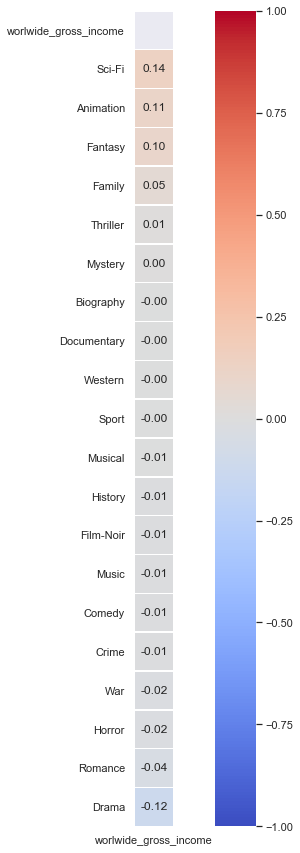

In [90]:
#
fig, ax = plt.subplots(figsize=(15,15)) #instantiate the plot
income_corr = imdb_genres_df.corr() #calculate correlation 
mask = np.zeros_like(income_corr[['worlwide_gross_income']], dtype=np.bool) #masking all the 1 values since they don't add any value
mask[np.triu_indices_from(mask)] = True #masking list
sns.heatmap(income_corr[['worlwide_gross_income']].sort_values(by=['worlwide_gross_income'],ascending=False), annot=True, fmt=".2f",linewidths=.5, ax=ax, vmin=-1, square=True, mask = mask, cmap='coolwarm');

###### Sci-fi, animation, and fantasy are clear winners. Drama and romance have a negative correlation implying that these genres lead to unimpressive returns.

### Section 5.2 Evlauting results for Question 2

Question 2 - Does the amount of funding for a movie have an impact on commercial success?
We will generate a scatter plot of the budget vs worldwide_gross_income to assess the distribution 


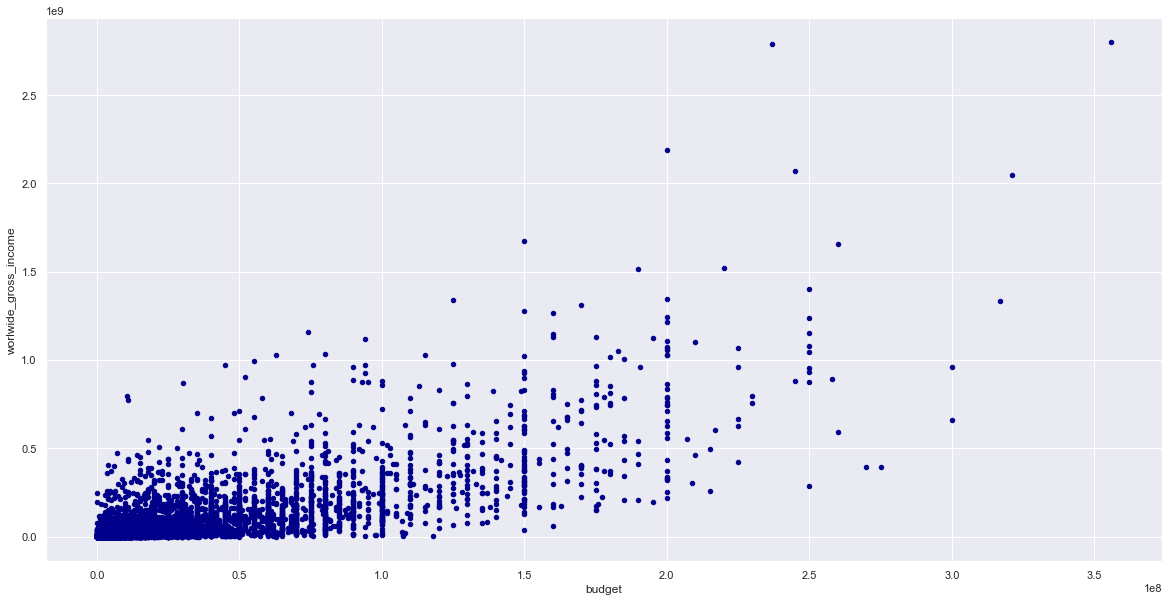

In [92]:
imdb_df.plot.scatter(x='budget',
                      y='worlwide_gross_income',
                      c='DarkBlue', figsize=(20,10),style='plain') #simple scatter plot generation function that defines the axes and size of plot

Based on the above plot, we can somewhat infer that budget and gross income are correlated. Let's see if we can draw a regression line to fit the plot

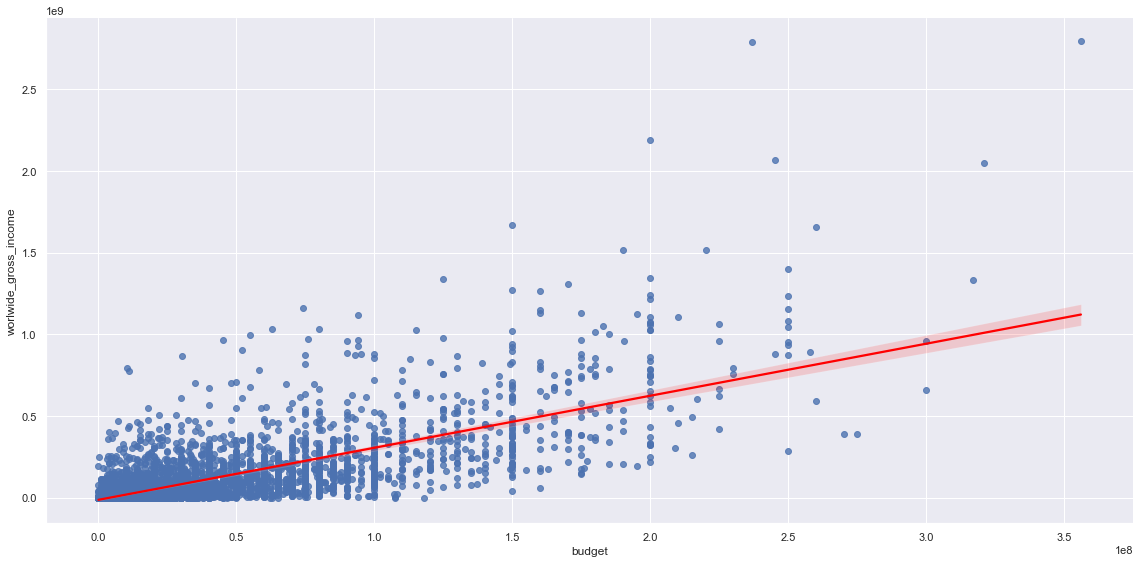

In [93]:
sns.lmplot(x='budget',y='worlwide_gross_income',data=imdb_df,fit_reg=True,line_kws={'color': 'red'},height=8, aspect=2)

In [94]:
#Clearly, there is correlation. Let's calculate the Pearson correltion between the two columns.
imdb_df['budget'].corr(imdb_df['worlwide_gross_income'])

0.7605150174255321

##### Conclusion: Budget and worldwide gross income are highly correlated

### Section 5.3 Evlauting results for Question 3

Question 2 - What impact does duration have on the success of a movie?


In [96]:
#Let's get an idea what the duration distribution looks like
imdb_df['duration'].describe()

count    29892.000000
mean       105.312793
std         20.518583
min         45.000000
25%         92.000000
50%        101.000000
75%        114.000000
max        808.000000
Name: duration, dtype: float64

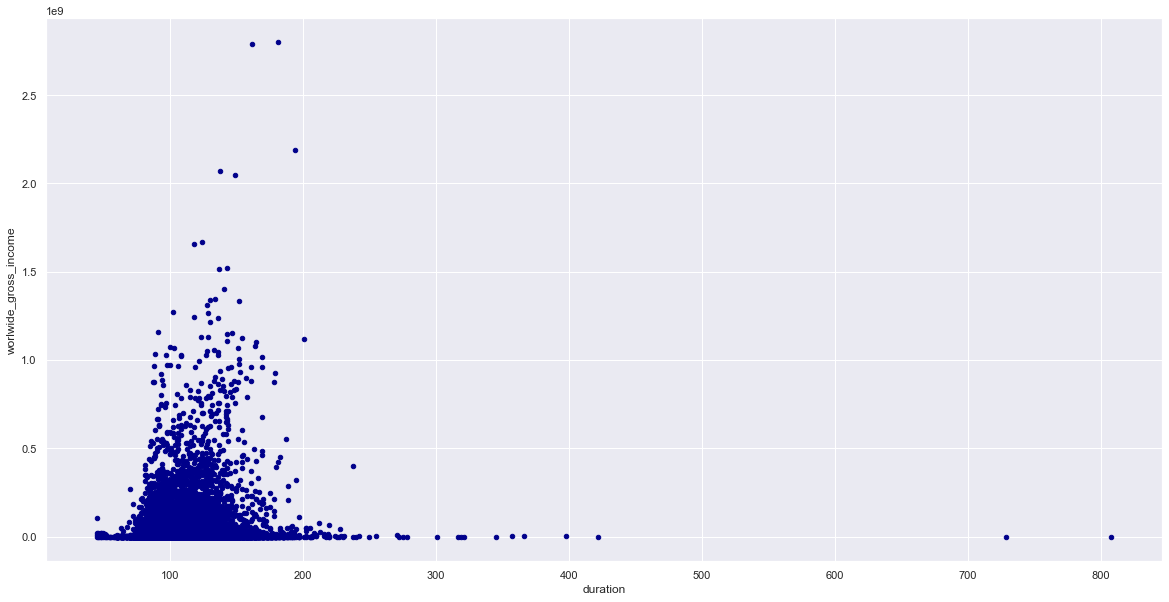

In [97]:
#We will generate a scatter plot of the duration vs worldwide_gross_income to assess the distribution 

imdb_df.plot.scatter(x='duration',
                      y='worlwide_gross_income',
                      c='DarkBlue', figsize=(20,10))

In [98]:
#The average length of a movie in our database is 105 minutes. Anything less or more tends to taper off the commercial value.
#We will seperate the duration into buckets
imdb_df['duration_binned'] = pd.cut(imdb_df['duration'], [0,30,60,90,120,150,180,210,240,270,300])

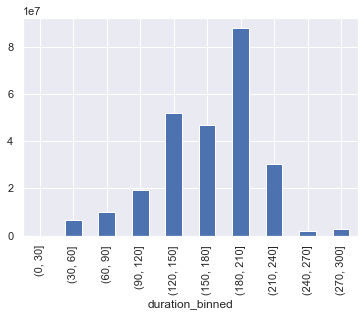

In [99]:
#We will then generate a bar chart distribution
imdb_df.groupby('duration_binned')['worlwide_gross_income'].mean().plot.bar()
#It seems the ideal movie falls within the bucket of 180 minutes to 210 minutes.

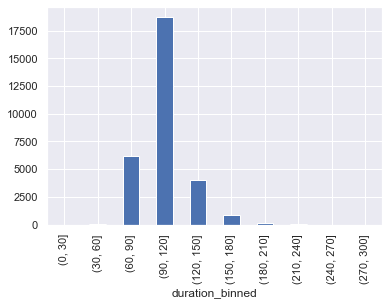

In [100]:
imdb_df.groupby('duration_binned')['worlwide_gross_income'].count().plot.bar()
#Turns out that the average commercial value in the 180-210 bucket which is high seems to be driven by a small number of highly successful movies.

In [40]:
imdb_df.groupby('duration')['worlwide_gross_income'].mean().idxmax() #For context, let's understand which movie is the source of greatest success

194

###### Conclusion: For production studios, perhaps this means pushing to fall within this bucket if they’ve got other variables right. But if they want to play it safe, falling within the 120 to 150 minutes will be a safer bet.

### Section 5.4 Evlauting results for Question 4

Question 4 - Do viewer ratings have an impact on how well a movie will do in the Box Office?


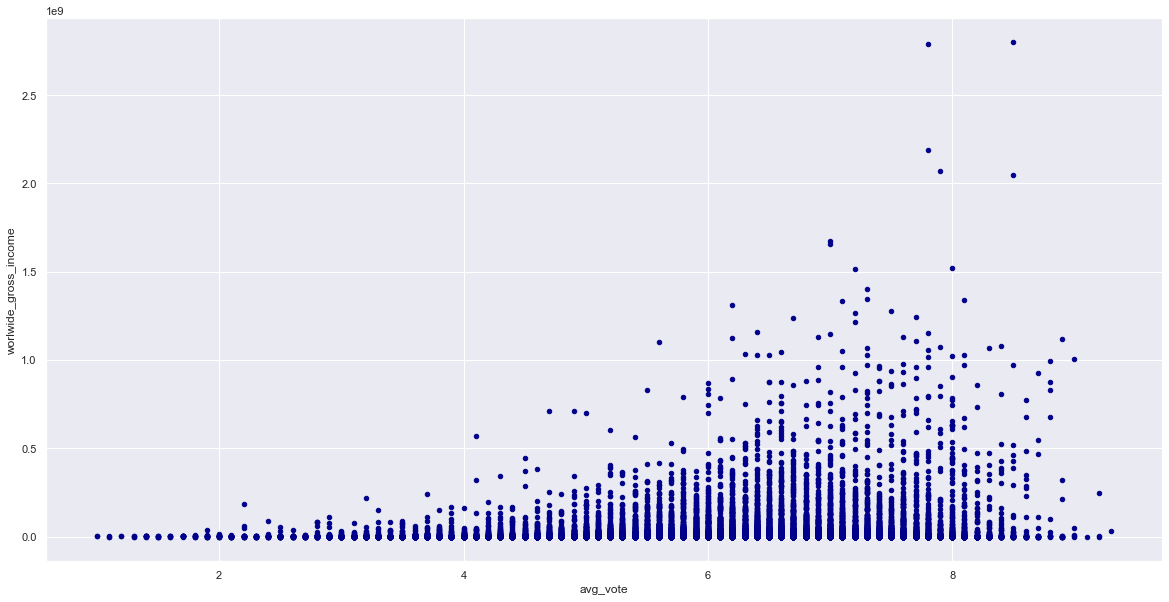

In [103]:
#We will generate a scatter plot of the avg_vote vs worldwide_gross_income to assess the distribution 

imdb_df.plot.scatter(x='avg_vote',
                      y='worlwide_gross_income',
                      c='DarkBlue',figsize=(20,10))

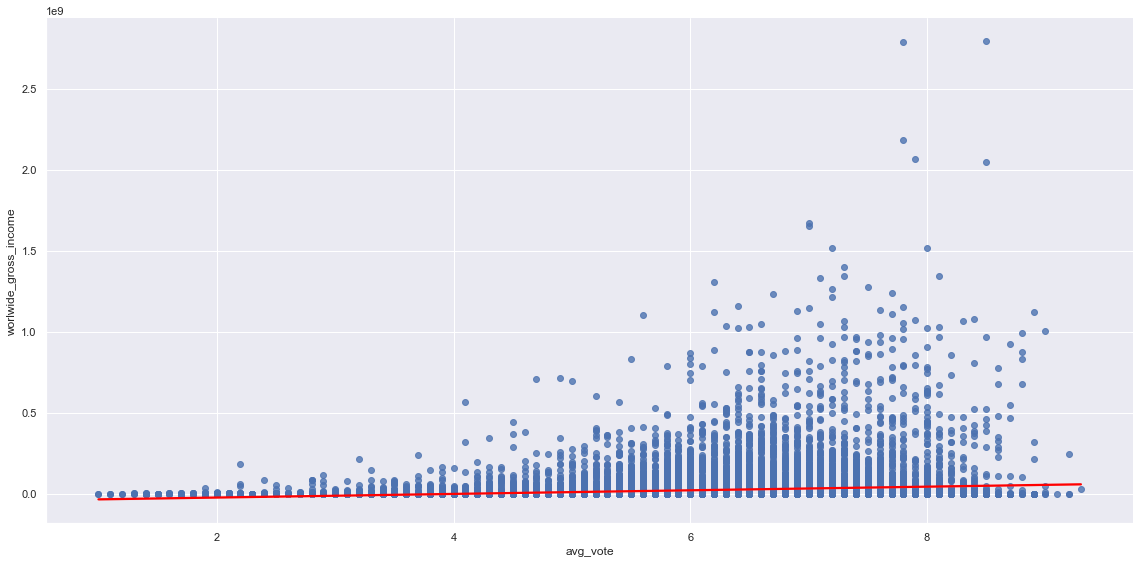

In [104]:
#We will draw a regression line to see if there's some correlation
sns.lmplot(x='avg_vote',y='worlwide_gross_income',data=imdb_df,fit_reg=True,line_kws={'color': 'red'},height=8, aspect=2)

In [105]:
#Shocking!  Let's calculate the Pearson correltion between the two columns.
imdb_df['avg_vote'].corr(imdb_df['worlwide_gross_income'])

0.13708953681695316

###### Conclusion: The average user rating has very little to no impact on worldwide gross income. In fact, the correlation between the two is just 13%! This is yet another incentive for movie studios to continue doing what they do best, and care little about ratings they receive from the audience.

### Section 5.5 Evaluating results for Question 5

Question 5 - Does the number of votes impact the success of a movie?

Similar to my approach in Question 4, I will perform an analysis and derive the correlation between the numbers of votes and the corresponding worldwide gross income.


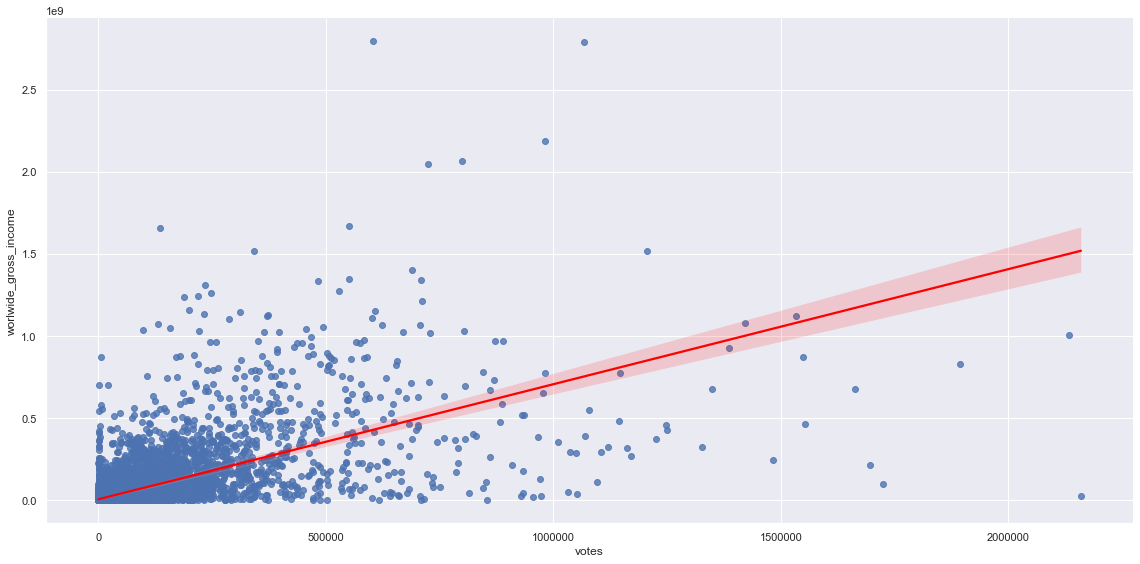

In [109]:
sns.lmplot(x='votes',y='worlwide_gross_income',data=imdb_df,fit_reg=True,line_kws={'color': 'red'},height=8, aspect=2)

In [110]:
#Clearly, there is correlation. Let's calculate the Pearson correltion between the two columns.
imdb_df['votes'].corr(imdb_df['worlwide_gross_income'])

0.6592665822608541

###### Conclusion: It seems the number of votes is a great proxy for the popularity of a movie, which corresponds to commercial success. Perhaps, the age-old proverb that “all publicity is good publicity” holds especially true for movies.

# Conclusion summary
1. We discovered that certain movie genres generate greater success than others.
2. The budget and number of user ratings have a strong positive impact on the likelihood of success of a movie.
3. Movie ratings have very little impact on the success of a movie.